In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

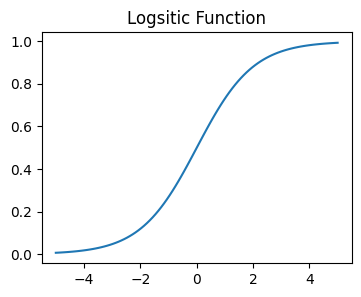

In [26]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.figure(figsize = (4,3))
plt.plot(x_values, y_values, )
plt.title('Logsitic Function')
plt.show()

In [27]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = "/content/drive/MyDrive/AlmaBetter/Machine Learning/Supervised Learning/Classification Algorithms/Logistic Regression/WA_Fn-UseC_-Telco-Customer-Churn.csv"

data = pd.read_csv(path)

print(f"Rows - {data.shape[0]} \nColumns - {data.shape[1]}")

Rows - 7043 
Columns - 21


In [29]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### That's a lot of columns, to simplify our experiment we will only use 2 features **tenure** and **MonthlyCharges** and the target would be **Churn**  of course. Let us do a simple EDA and visualization on our features and target.

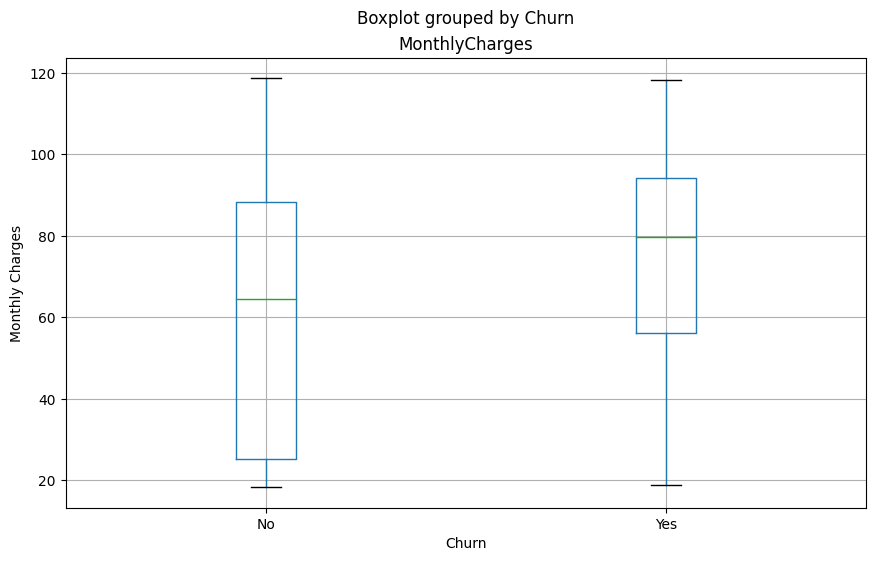

In [31]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
df.boxplot(column = "MonthlyCharges", by = "Churn", ax = ax)
ax.set_ylabel("Monthly Charges")
plt.show()

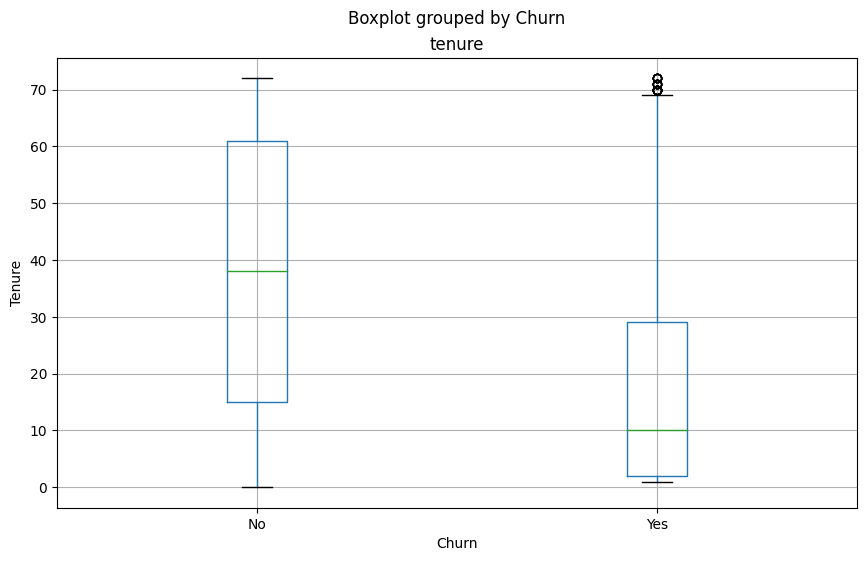

In [32]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
df.boxplot(column = "tenure", by = "Churn", ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

In [33]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [34]:
df.shape

(7043, 22)

In [35]:
## Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [36]:
y_train.value_counts()


0    4133
1    1501
Name: class, dtype: int64

In [37]:
y_test.value_counts()


0    1041
1     368
Name: class, dtype: int64

In [38]:
# Fitting Logistic Regression on train data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True, max_iter = 10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [39]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [40]:
clf.intercept_

array([-1.77408975])

In [41]:
## Evaluating the perfomance of Train model

train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [42]:
train_preds

array([[0.95339588, 0.04660412],
       [0.73651841, 0.26348159],
       [0.99306604, 0.00693396],
       ...,
       [0.9873984 , 0.0126016 ],
       [0.38179791, 0.61820209],
       [0.7897834 , 0.2102166 ]])

In [43]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [44]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [45]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
## Get the accuracy scores
from sklearn.metrics import accuracy_score, confusion_matrix
train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [49]:
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


### <B> Confusion Matrix

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

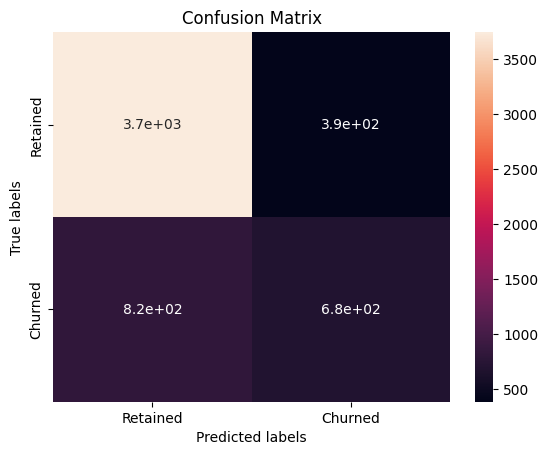

In [53]:
import seaborn as sns

labels = ["Retained", "Churned"]

cm_train = confusion_matrix(y_train, train_class_preds)
print(cm_train)

ax = plt.subplot()
sns.heatmap(cm_train, annot = True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0.5, 0, 'Retained'), Text(1.5, 0, 'Churned')]

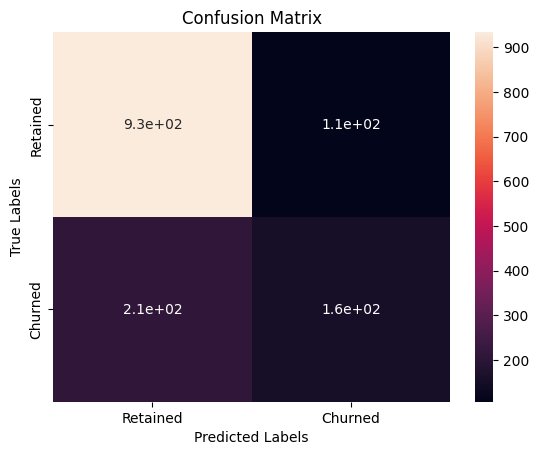

In [55]:
cm_test = confusion_matrix(y_test, test_class_preds)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot = True, ax = ax)

ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
ax.set_title("Confusion Matrix")
ax.yaxis.set_ticklabels(labels)
ax.xaxis.set_ticklabels(labels)

### <b>Implementing Cross Validation 

In [56]:
from sklearn.model_selection import cross_validate

In [57]:
logistic = LogisticRegression()

In [61]:
scoring = ["accuracy"]
clf_cv = cross_validate(logistic, X_train, y_train, scoring = scoring, cv = 5, return_train_score = True, return_estimator = True, verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [62]:
clf_cv["train_accuracy"]

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [64]:
clf_cv["test_accuracy"]

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [65]:
clf_cv["estimator"]

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [66]:
for model in clf_cv["estimator"]:
  print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]


# <b><u> Evaluation metrics for classification models </u></b>

* #### <b><u>Accuracy</u></b> : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.


* #### <b><u>Precision</u></b> :  Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.

* #### <b><u>Recall</u></b> : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.

* #### <b><u>F1-Score</u></b> : This is defined as the harmonic mean of precision and recall. 

* #### <b><u>Log Loss</u></b> : This is defined as \begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

 Here M refers to the number of observations and $y^{i}$ = 1 or 0 depending upon the label for the $i^{th}$ observation and $P^{i}$ is the probability of class 1 or probability of getting a HIT.

* #### <b><u>AUC-ROC</u></b> - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.